In [3]:
import networkx as nx
import community as community_louvain
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import osmnx as ox
import nxmetis
import metis

# $pip install community
# $pip install python-louvain
# $pip install networkx-metis (https://github.com/networkx/networkx-metis)
# --------------------------------------------
# Communautés dans les graphes
# L'erreur pour l'import de networkx ne gène pas

In [20]:
def init_polynomials(n, r, c, e):
    sr = mq.SR(n, r, c, e, gf2=True, polybori=True, allow_zero_inversions=True)
    f, _ = sr.polynomial_system()
    G = f.connection_graph()
    return G

# augmenter le nombre de tours ne change pas le comportement des communautés entre elles
# le graphe grossit énormément entre n=1 et n=10 mais le graphe garde un bon équilibre
# --------------------------------------------
# réduire les colonnes / lignes de mq.SR simplifie énormément le graphe
# pour aes-64, le graphe donné par les paramètres (n, 2, 4, 8) est beaucoup plus petit
# que celui donné par (n, 4, 4, 4)

In [5]:
def plot_graph(G):
    N = G.networkx_graph() # N is undirected by default
    partition = community_louvain.best_partition(N)

    # draw the graph
    pos = nx.spring_layout(N)
    # color the nodes according to their partition
    cmap = cm.get_cmap('viridis_r', max(partition.values()) + 1)

    nx.draw_networkx_nodes(N, pos, partition.keys(), node_size=40, cmap=cmap, node_color=list(partition.values()))
    nx.draw_networkx_edges(N, pos, alpha=0.5)
    
    print("Number of communities within the graph:", max(partition.values()) + 1) # nombre de communautés
    print("Number of nodes:", len(pos)) # nombre de sommets dans le graphe

    plt.show()

In [6]:
def plot_gephi(G):
    partition = community_louvain.best_partition(separated)

    # draw the graph
    pos = nx.spring_layout(separated)
    # color the nodes according to their partition
    cmap = cm.get_cmap('viridis_r', max(partition.values()) + 1)

    nx.draw_networkx_nodes(separated, pos, partition.keys(), node_size=40, cmap=cmap, node_color=list(partition.values()))
    nx.draw_networkx_edges(separated, pos, alpha=0.5)
    
    print("Number of communities within the graph:", max(partition.values()) + 1) # nombre de communautés
    print("Number of nodes:", len(pos)) # nombre de sommets dans le graphe
    print("Number of connected components:", nx.number_connected_components(separated))

    plt.show()

In [7]:
# remove tous les noeuds du graphe dont le degré est compris dans entre deg_min et deg_max inclus
# spécifier un chemin pour savegarder en fichier gexf
# avec un graphe de sagemath
def cut_nodes_degree(G, deg_min, deg_max, path=""):
    N = G.networkx_graph()
    print("density:", nx.density(N))
    
    nodes = list(N.degree)
    count = 0
    for i in range(N.number_of_nodes()):
        if nodes[i][1] >= deg_min and nodes[i][1] <= deg_max:
            count += 1
            N.remove_node(nodes[i][0])
            
    print("removed", count, "cut points")
    print("new density:", nx.density(N))
    print("connected components:", nx.number_connected_components(N))
    
    if path != "":
        nx.write_gexf(N, path)
        print("graph file saved")

In [51]:
# remove tous les sommets d'un graphe à partir d'une liste
# la liste est généralement celle obtenue après une séparation utilsiant nxmetis
# pour visualiser le graphe après séparation (pour voir le comportement de nxmetis)
def remove_nodes_with_list(G, nodes, path=""):
    N = G.networkx_graph()
    for node in nodes:
        N.remove_node(node)

    if path != "":
        nx.write_gexf(N, path)
        print("graph file saved")

False
Number of communities within the graph: 8
Number of nodes: 164


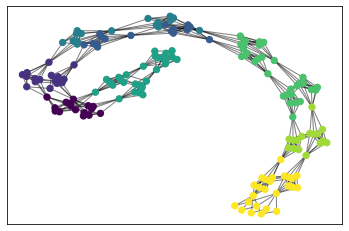

In [12]:
# exemple avec AES-4
graph4 = init_polynomials(10, 1, 1, 4)
print(graph4.is_split())
plot_graph(graph4)

# On peut voir que le graph est "tressé"
# et que le nombre de tours ne rend pas le graphe chaotique mais augmente juste sa taille
# et tend à créer des communautés séparées par peu de sommets, une sorte d'ordonnement du graphe
# --------------------------------------------
# On peut observer pour n petit que le graphe possède une "couronne" de sommets
# dont les liens vont vers toutes les communautés du graphe, ce qui complexifie la séparation de graphe
# cette couronne est de plus en plus dense lorsque les bits de la clef augmentent

In [14]:
nx.write_gexf(graph4.networkx_graph(), "graph4.gexf")

# GEPHI work...

Number of communities within the graph: 7
Number of nodes: 162
Number of connected components: 2


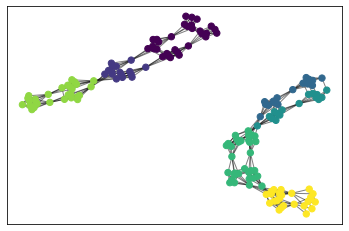

In [16]:
# GEPHI work... graph séparé sur GEPHI

path = "../graph_files/graph4_separated.gml"
separated = nx.read_gml(path)
plot_gephi(separated)

Number of communities within the graph: 6
Number of nodes: 272


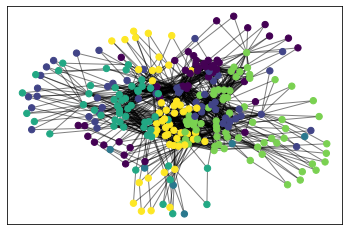

In [18]:
# AES-64 pour 1 tour
graph64 = init_polynomials(1, 2, 4, 8)
plot_graph(graph64)

Number of communities within the graph: 11
Number of nodes: 688


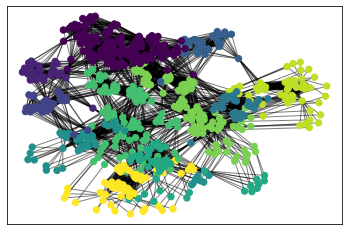

In [19]:
# AES-64 pour 3 tour cette fois
graph64 = init_polynomials(3, 2, 4, 8)
plot_graph(graph64)

# On peut voir par comparaison que le graphe possède la même morphologie
# même s'il y a plus de sommets, les comportement entre les communautés reste sensiblement le même
# on peut aussi distinguer plus aisément des sommets-charnières, des sommets qui ont 

In [20]:
nx.write_gexf(graph64.networkx_graph(), "aes64_3tours.gexf")

# GEPHI work...

In [21]:
cut_nodes_degree(graph64, 21, 35, "aes64_3tours.gexf")

density: 0.014903016147049863
removed 48 cut points
new density: 0.012089201877934273
connected components: 1
graph file saved


Number of communities within the graph: 45
Number of nodes: 544


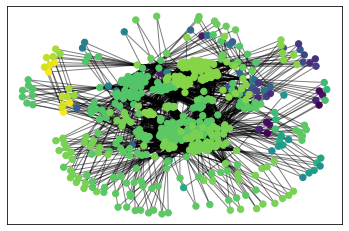

In [18]:
# On continue pour AES-128, 1 tour
graph128 = init_polynomials(1, 4, 4, 8)
plot_graph(graph128)

# Déjà, on peut voir que la couronne est beaucoup plus complexe

Number of communities within the graph: 15
Number of nodes: 1376


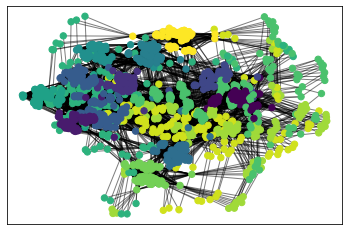

In [22]:
# AES-128, 3 tour
graph128 = init_polynomials(3, 4, 4, 8)
plot_graph(graph128)

In [24]:
nx.write_gexf(graph128.networkx_graph(), "aes128_3tours.gexf")

# GEPHI work...

In [40]:
cut_nodes_degree(graph128, 30, 35)

density: 0.011505285412262157
removed 60 cut points
new density: 0.010429114611624117


Number of communities within the graph: 29
Number of nodes: 3040


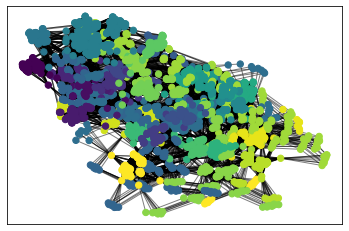

In [20]:
# AES-128, 7 tour
graph128 = init_polynomials(7, 4, 4, 8)
plot_graph(graph128)

# Là, ça devient illisible, donc on quitte sage pour passer en python / GEPHI

Number of communities within the graph: 45
Number of nodes: 4288


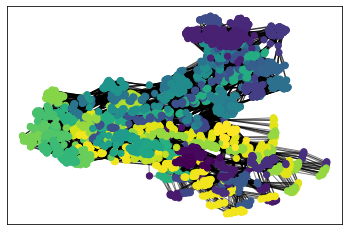

In [23]:
# AES-128, 10 tour
graph128 = init_polynomials(10, 4, 4, 8)
plot_graph(graph128)

In [24]:
nx.write_gexf(graph128.networkx_graph(), "aes128_10tours.gexf")

# GEPHI work...

In [7]:
# AES128 1, 2  et 5 tours, pourquoi le nombre de communauté n'évolue pas linéairement
# densité ?
graph128_1 = init_polynomials(1, 4, 4, 8)
graph128_2 = init_polynomials(2, 4, 4, 8)
graph128_5 = init_polynomials(5, 4, 4, 8)

d1 = nx.density(graph128_1.networkx_graph())
d2 = nx.density(graph128_2.networkx_graph())
d5 = nx.density(graph128_5.networkx_graph())

print("Density for rounds 1 / 2 / 5:", d1, d2, d5)

Density for rounds 1 / 2 / 5: 0.024563969234102482 0.015762947514772332 0.007445020127000388


In [54]:
# tests de séparation avec nxmetis

G = init_polynomials(10, 4, 4, 8)
split = nxmetis.vertex_separator(G.networkx_graph())

print("Nodes to be removed:", len(split[0]))
print("First part of bisected graph has a size of", len(split[1]))
print("Second part of bisected graph has a size of", len(split[2]))

# on remodèle le graphe en enlevant ce que nxmetis enlève pour regarder avec GEPHI
remove_nodes_with_list(G, split[0], "ok.gexf")

Nodes to be removed: 148
First part of bisected graph has a size of 2050
Second part of bisected graph has a size of 2090
graph file saved


In [33]:
split = metis.part_graph(G, 2)